In [2]:
import numpy as np
import matplotlib.pyplot as plt

import keras

2025-02-14 16:24:18.977546: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-14 16:24:18.989321: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739546659.008005   10364 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739546659.013827   10364 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-14 16:24:19.030596: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
def true_function(x):
    return (
        (np.abs(x)) ** 0.5
        + 0.1 * x
        + 0.01 * x ** 2
        + 1
        - np.sin(x)
        + 0.5 * np.exp(x / 10.0)
        ) / (0.5 + np.abs(np.cos(x)))

In [4]:
n_train = 1024
noise = 0.1
domain = (-10, 10)

x_train = np.random.uniform(*domain, n_train)
y_train = true_function(x_train) + np.random.normal(0, noise, n_train)

# Add no noise to the test set (maybe we have some high-quality data...)
x_test = np.linspace(*domain, 1000)
y_test = true_function(x_test)

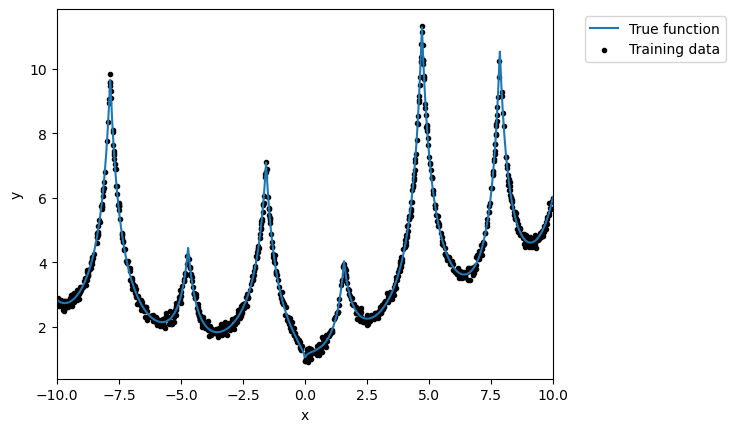

In [5]:
def plot_data():
    plt.plot(
        x_test, true_function(x_test),
        label="True function")

    plt.scatter(
        x_train, y_train,
        c='k', marker='.', label="Training data")

def finish_plot():
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.autoscale(axis='x', tight=True)
    plt.xlabel("x")

    plt.ylabel("y")

plot_data()
finish_plot()

If we know about 

In [36]:
n_epochs = 100
width = 64
learn_rate = 0.01
batch_size = 128 # should be a power of two

model = keras.models.Sequential([
    keras.layers.InputLayer(shape=(1,)), # shape of x is (n_samples, n_features)
    keras.layers.Normalization(mean = x_train.mean(), variance = x_train.var()), 
    keras.layers.Dense(width, activation="relu"), # our linear layers with 64 neurons
    keras.layers.Dense(width, activation="relu"), # our linear layers
    keras.layers.Dense(width, activation="relu"), # our linear layers
    keras.layers.Dense(width, activation="relu"), # our linear layer
    keras.layers.Dense(1), # note we don't really need an activation function here we just combine everything into one 
    keras.layers.Lambda(lambda x: x * y_train.std() + y_train.mean())
])

# Cosine decay schedule
# warmup_epochs = n_epochs * 0.1
# schedule = keras.optimizers.schedules.CosineDecay(
#     initial_learning_rate=1e-6,
#     warmup_target=0.01,
#     warmup_steps=warmup_epochs,
#     decay_steps=n_epochs - warmup_epochs)

# fitting the model
model.compile(
    optimizer = keras.optimizers.Adam(learn_rate),
    loss = 'mean_squared_error'
)

model.summary()

history = model.fit(x_train, y_train, 
                    epochs=n_epochs, verbose=0,
                    batch_size = batch_size,
                    validation_data=(x_test, y_test))

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
print(history.history['val_loss'][-1])

0.15337267518043518


Text(0, 0.5, 'Loss')

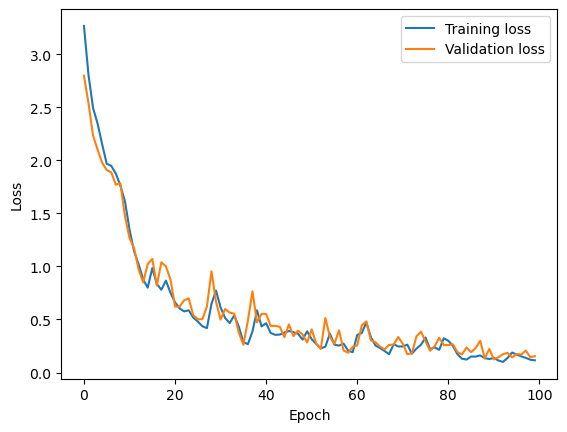

In [38]:
# Basic training history plot
plt.figure()
# Training loss
plt.plot(history.history['loss'], label='Training loss')
# Test loss
plt.plot(history.history['val_loss'], label='Validation loss')

plt.legend(loc='best')

#plt.xscale('log')
plt.xlabel("Epoch")

#plt.yscale('log')
plt.ylabel("Loss")
#plt.ylim(0, .1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


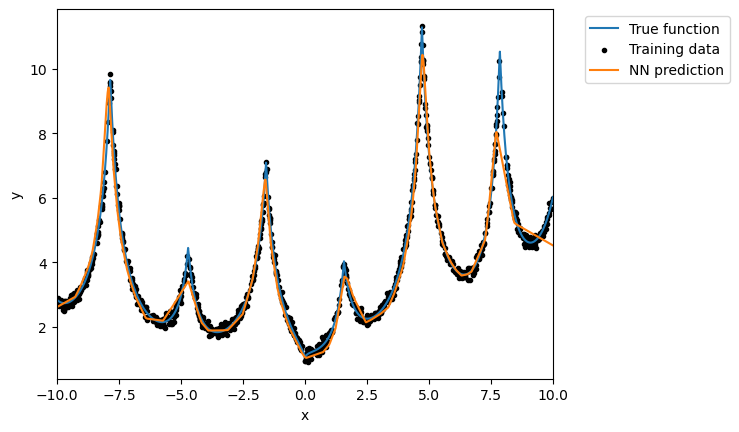

In [39]:
# Predict on the test data
y_pred = model.predict(x_test)

plot_data()
plt.plot(x_test, y_pred, label="NN prediction")
finish_plot()

In [ ]:
# checking sshapes
